In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"E:\Imarticus\Nikita Ma'am\K Means Clustering\Mall_Customers\Mall_Customers.csv",index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [11]:
#creating only x and not y since y is not there
x=df.values[:,[2,3]]  

#since working with only 2 columns that is Annual Income and Spending Score 

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


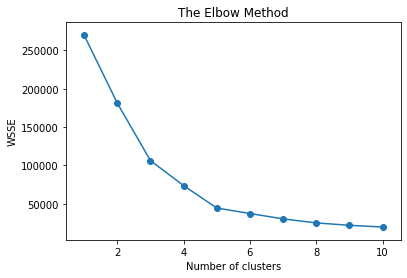

In [14]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):             #works on 10 differet k values
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)   #inertia_ is a statistical name of wsse 
    
plt.plot(range(1, 11), wsse)     # line plot
#plt.scatter(range(1, 11),wsse)   #gives scatter points on line plot
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show();

In [15]:
#K-Means clustering
kmeans=KMeans(n_clusters=5,random_state=10) #n_clusters=5 because from above graph and always consider last elbow point
y_pred=kmeans.fit_predict(x)
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [16]:
kmeans.inertia_   #wsse value

44448.45544793371

In [17]:
kmeans.n_iter_  #number of iteration behide the scene

5

In [18]:
#converted unlabelled data to labelled data
df['Clusters']=y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


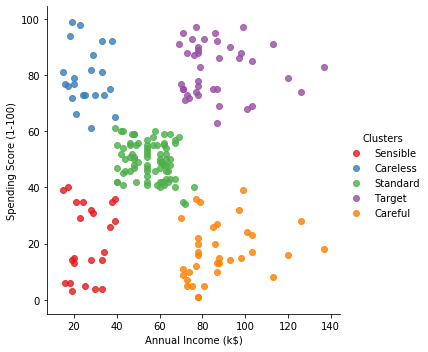

In [23]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black')#also plot cluster centroids
plt.show();

In [21]:
#renaming clusters
df['Clusters']=df.Clusters.replace({0:'Careless',1:'Standard',2:'Target',3:'Sensible',4:'Careful'})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible
...,...,...,...,...,...
196,Female,35,120,79,Target
197,Female,45,126,28,Careful
198,Male,32,126,74,Target


In [24]:
#giving the client only the target customers because that is only needed for him
new_df=df[df.Clusters=='Target']
new_df.shape

(39, 5)

In [25]:
new_df.to_excel(r'Target Customers.xlsx', index=True)

In [ ]:
#if client says he is not statisfied with target customers and what if he want another customers
#eg. careless cluster
#then tell client that give me some time i will work on it and let u known but carge will 
#increase and then just do this step
#new_df=df[df.Clusters=='Careless']
#new_df.to_excel(r'Target Customers.xlsx', index=True)